# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

In [16]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

In [17]:
L = pcc.LCfitClass()

In [18]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [19]:
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh.dat'))
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh_Bessell.dat'))


print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2011dh_Bessell.dat


In [20]:
L.data

OrderedDict([('BessellB', <Table length=132>
                MJD            flux          ...       flux_upper             flux_lower      
                 d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
              float64        float64         ...        float64                float64        
              ------- ---------------------- ... ---------------------- ----------------------
              55701.0            1.31419e-16 ...          1.3474384e-16          1.2809416e-16
              55702.0            1.67818e-16 ...          1.7184226e-16          1.6379374e-16
              55703.0            2.14181e-16 ...          2.1903443e-16          2.0932757e-16
              55704.0            2.73195e-16 ...          2.7902536e-16          2.6736464e-16
              55705.0            3.48262e-16 ...          3.5523522e-16          3.4128878e-16
              55706.0            4.43673e-16 ...          4.5197214e-16          4.3537386e-16
     

In [21]:
L.data_filters
L.data_filters['BessellB'].__dict__

{'_filter_file_path': '/Users/berto/Code/CoCo/data/filters/BessellB.dat',
 '_lower_edge': 3600.0,
 '_plot_colour': '#0000ff',
 '_upper_edge': 5600.0,
 '_wavelength_units': Unit("Angstrom"),
 'filter_name': 'BessellB',
 'lambda_effective': <Quantity 4354.410549343705 Angstrom>,
 'throughput': array([ 0.   ,  0.03 ,  0.134,  0.567,  0.92 ,  0.978,  1.   ,  0.978,
         0.935,  0.853,  0.74 ,  0.64 ,  0.536,  0.424,  0.325,  0.235,
         0.15 ,  0.095,  0.043,  0.009,  0.   ]),
 'wavelength': array([ 3600.,  3700.,  3800.,  3900.,  4000.,  4100.,  4200.,  4300.,
         4400.,  4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,
         5200.,  5300.,  5400.,  5500.,  5600.]),
 'wavelength_u': <Quantity [ 3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
             4500., 4600., 4700., 4800., 4900., 5000., 5100., 5200., 5300.,
             5400., 5500., 5600.] Angstrom>}

In [22]:
L.get_fit_splines()

BessellB
BessellI
BessellR
BessellV


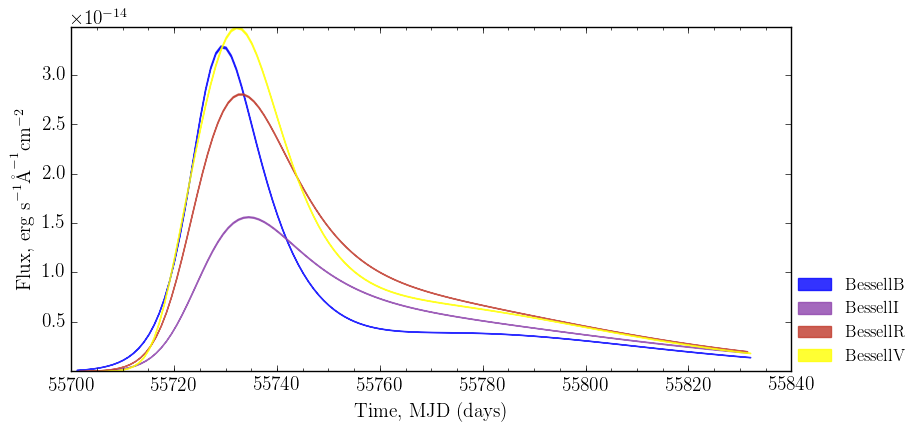

In [23]:
L.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1104ea450>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


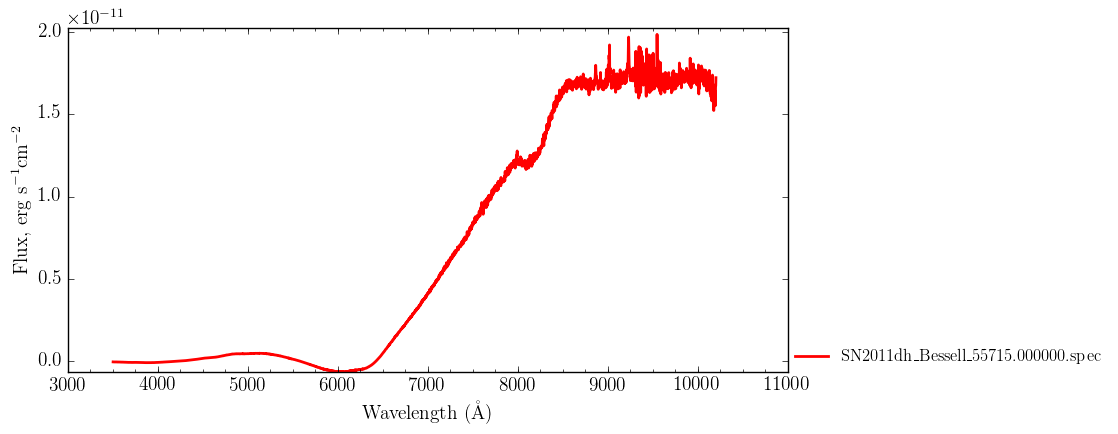

In [24]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x11029ff90>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


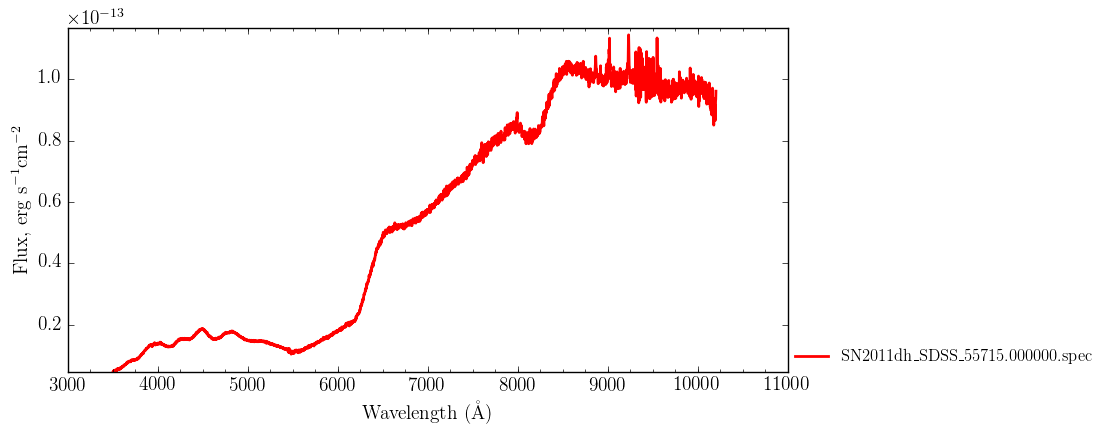

In [10]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x110a59890>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


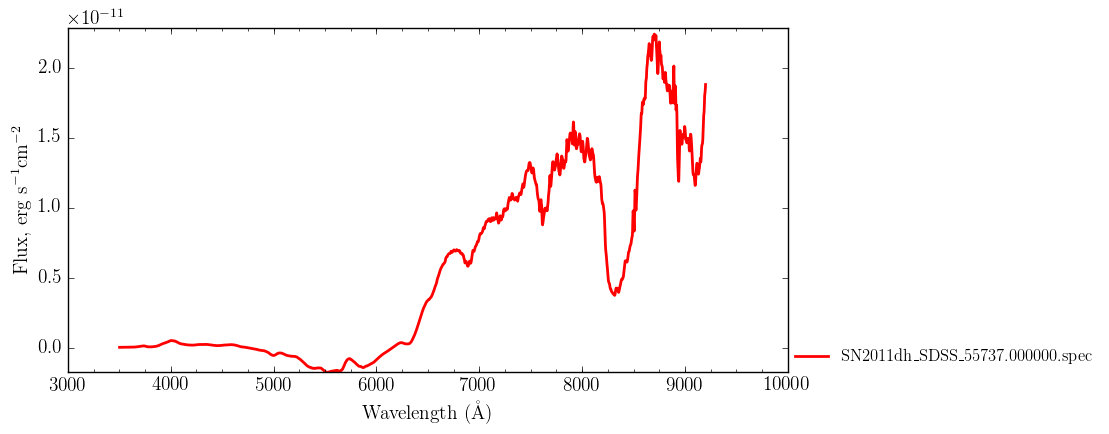

In [32]:
# recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec'
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()
# spec_table = Table.read(recon_spec_path, format = fmt, names = names)
# spec_table.

In [34]:
filename = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec'

T = Table.read(filename, format = "ascii", names = ("wavelength", "flux", "flux_err"))

In [ ]:
T.

You didn't supply a directory, so using self.data_directory
Reading /Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1065e37d0>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux')>, 'primary_key': None}


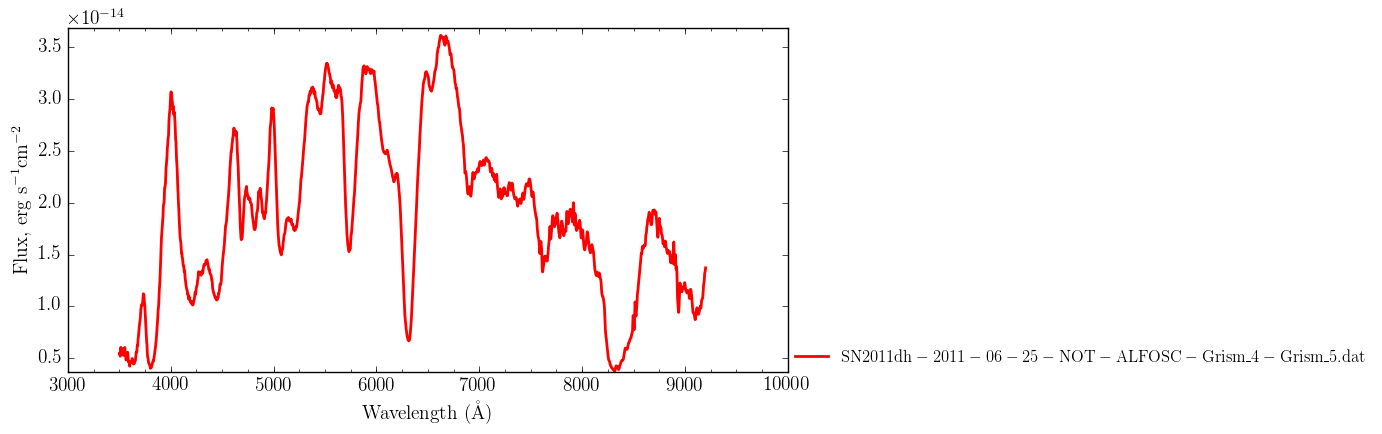

In [12]:
obs_spec_path = '/Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat'
S = pcc.SpectrumClass()
S.load(filename = obs_spec_path)
S.plot()

1.10310563111e-13 1.89593692564e-14


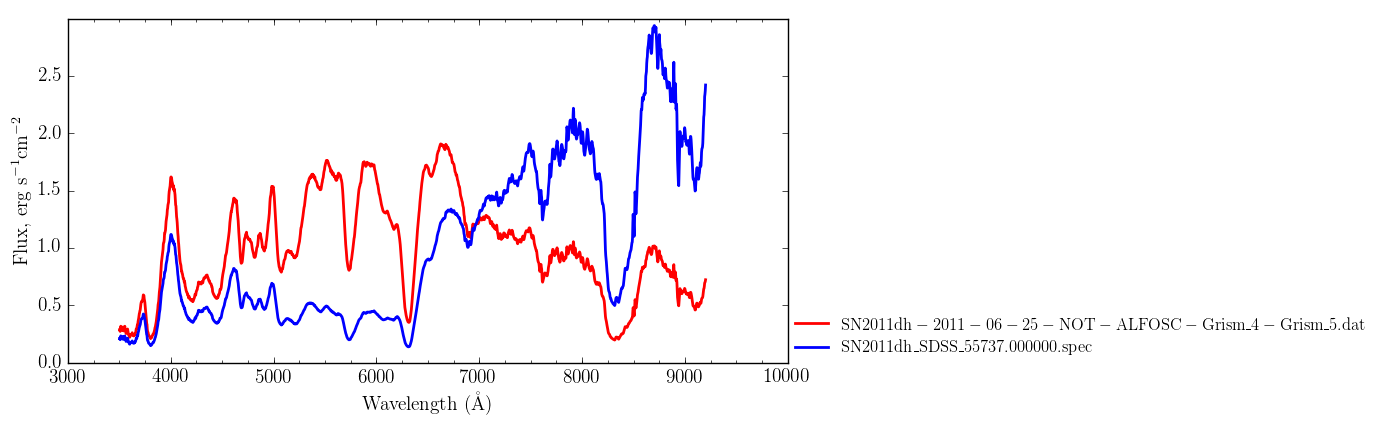

In [13]:
reload(pcc)
pcc.compare_spec(S, mS)

In [14]:
# sn = pcc.SNClass('SN2009jf')
sn = pcc.SNClass('SN2005hg')

sn.name

'SN2005hg'

/Users/berto/Code/verbose-enigma/testdata/lc/SN2005hg.dat


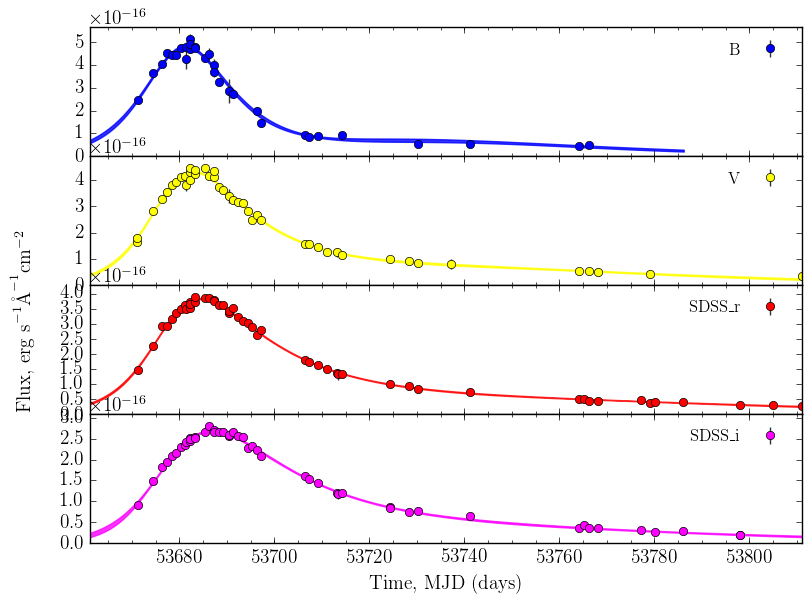

In [15]:
sn.load_phot()
# recon_filename = os.path.abspath(os.path.join('/Users/berto/Code/CoCo/recon/', 'SN2009jf.dat'))
recon_filename = os.path.abspath(os.path.join('/Users/berto/Code/CoCo/recon/', 'SN2005hg.dat'))

sn.get_lcfit(recon_filename)
sn.plot_lc()